### Data extraction
Extract data from MIMIC-III

In [1]:
import time
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import cufflinks

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [2]:
# Import pandas 
import pandas as pd 

start = time.time()
# reading csv file 
admissions_df = pd.read_csv("../datasets/mmc-3/ADMISSIONS.csv")
noteevents_df = pd.read_csv("../datasets/mmc-3/NOTEEVENTS.csv") 
end = time.time()
print(end - start)


/home/evan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.



32.114184856414795


In [3]:
# diagnosis = df.DIAGNOSIS.unique()
# #PNEUMONIA
# for i in diagnosis:
#     print(f"[{i}]")
# data = df.copy()
# data.info()

# pneumonia_df = data.loc[df['DIAGNOSIS'] == 'PNEUMONIA']
# pneumonia_df.info()

In [4]:
admissions_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [5]:
noteevents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


In [6]:
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [7]:
# https://towardsdatascience.com/left-join-with-pandas-data-frames-in-python-c29c85089ba4
# left_join = noteevents_df.join(admissions_df.set_index('HADM_ID'), on='HADM_ID')
# left_join = noteevents_df.set_index('HADM_ID').join(admissions_df.set_index('HADM_ID'))
"""
>>> left
  transaction_id user_id     value
0              A   Peter  1.867558
1              B    John -0.977278
2              C    John  0.950088
3              D    Anna -0.151357
>>> right
  user_id favorite_color
0    Paul           blue
1    Mary           blue
2    John            red
3    Anna            NaN

---------
>>> left.merge(right, on='user_id', how='left', indicator=True)
  transaction_id user_id     value favorite_color     _merge
0              A   Peter  1.867558            NaN  left_only
1              B    John -0.977278            red       both
2              C    John  0.950088            red       both
3              D    Anna -0.151357            NaN       both

---------
left.merge(right.rename({'user_id': 'user_id_r'}, axis=1),
               left_on='user_id', right_on='user_id_r', how='left')
               
  transaction_id user_id     value user_id_r favorite_color
0              A   Peter  1.867558       NaN            NaN
1              B    John -0.977278      John            red
2              C    John  0.950088      John            red
3              D    Anna -0.151357      Anna            NaN
---------
select
    t.transaction_id
    , t.user_id
    , t.value
    , u.user_id as user_id_r
    , u.favorite_color
from
    transactions t
    left join
    users u
    on t.user_id = u.user_id
;
"""

"\n>>> left\n  transaction_id user_id     value\n0              A   Peter  1.867558\n1              B    John -0.977278\n2              C    John  0.950088\n3              D    Anna -0.151357\n>>> right\n  user_id favorite_color\n0    Paul           blue\n1    Mary           blue\n2    John            red\n3    Anna            NaN\n\n---------\n>>> left.merge(right, on='user_id', how='left', indicator=True)\n  transaction_id user_id     value favorite_color     _merge\n0              A   Peter  1.867558            NaN  left_only\n1              B    John -0.977278            red       both\n2              C    John  0.950088            red       both\n3              D    Anna -0.151357            NaN       both\n\n---------\nleft.merge(right.rename({'user_id': 'user_id_r'}, axis=1),\n               left_on='user_id', right_on='user_id_r', how='left')\n               \n  transaction_id user_id     value user_id_r favorite_color\n0              A   Peter  1.867558       NaN            Na

In [8]:
start = time.time()
# Left join of two dataframes
note_admiss_df_left = noteevents_df.merge(admissions_df, on='HADM_ID', how='left', indicator=True)
end = time.time()
print(end - start)

5.317253351211548


In [9]:
note_admiss_df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083180 entries, 0 to 2083179
Data columns (total 30 columns):
 #   Column                Dtype   
---  ------                -----   
 0   ROW_ID_x              int64   
 1   SUBJECT_ID_x          int64   
 2   HADM_ID               float64 
 3   CHARTDATE             object  
 4   CHARTTIME             object  
 5   STORETIME             object  
 6   CATEGORY              object  
 7   DESCRIPTION           object  
 8   CGID                  float64 
 9   ISERROR               float64 
 10  TEXT                  object  
 11  ROW_ID_y              float64 
 12  SUBJECT_ID_y          float64 
 13  ADMITTIME             object  
 14  DISCHTIME             object  
 15  DEATHTIME             object  
 16  ADMISSION_TYPE        object  
 17  ADMISSION_LOCATION    object  
 18  DISCHARGE_LOCATION    object  
 19  INSURANCE             object  
 20  LANGUAGE              object  
 21  RELIGION              object  
 22  MARITAL_STATUS    

In [10]:
note_admiss_df_left.shape

(2083180, 30)

In [11]:
# df1 = df[['a','b']]
note_admiss_df_left[['DIAGNOSIS', 'SUBJECT_ID_x', 'SUBJECT_ID_y','DESCRIPTION', 'CATEGORY']]

,DIAGNOSIS,SUBJECT_ID_x,SUBJECT_ID_y,DESCRIPTION,CATEGORY
0,RT LOWER LOBE PNEUMONIA,22532,22532.0,Report,Discharge summary
1,CHRONIC OBSTRUCTIVE PULMONARY DISEASE,13702,13702.0,Report,Discharge summary
2,TRACHEALBRONCHEAL MALACEA/SDA,13702,13702.0,Report,Discharge summary
3,ASTHMA;COPD EXACERBATION,13702,13702.0,Report,Discharge summary
4,S/P FALL;TELEMETRY,26880,26880.0,Report,Discharge summary
...,...,...,...,...,...
2083175,NEWBORN,31097,31097.0,Report,Nursing/other
2083176,NEWBORN,31097,31097.0,Report,Nursing/other
2083177,NEWBORN,31097,31097.0,Report,Nursing/other
2083178,NEWBORN,31097,31097.0,Report,Nursing/other


In [12]:
pneumonia_df = note_admiss_df_left.loc[note_admiss_df_left["DIAGNOSIS"] == 'PNEUMONIA', ['ROW_ID_x', 'SUBJECT_ID_x', 'HADM_ID', 'CHARTDATE', 'CHARTTIME', 'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'DIAGNOSIS', 'HAS_CHARTEVENTS_DATA']]

In [13]:
pneumonia_df.shape

(59727, 17)

In [14]:
pneumonia_df['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in noteevents')

In [15]:
#pneumonia_no_disch_df = pneumonia_df.loc[pneumonia_df["CATEGORY"] != 'Discharge summary', ['ROW_ID_x', 'SUBJECT_ID_x', 'HADM_ID', 'CHARTDATE', 'CHARTTIME', 'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'DIAGNOSIS', 'HAS_CHARTEVENTS_DATA']]
pneumonia_no_disch_df = pneumonia_df.loc[pneumonia_df["CATEGORY"] != 'Discharge summary', ['ROW_ID_x','SUBJECT_ID_x','CHARTDATE','STORETIME','CATEGORY','DESCRIPTION','TEXT', 'DEATHTIME']]

In [16]:
pneumonia_no_disch_df['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in noteevents')

In [17]:
pneumonia_no_disch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58029 entries, 59103 to 2066669
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ROW_ID_x      58029 non-null  int64 
 1   SUBJECT_ID_x  58029 non-null  int64 
 2   CHARTDATE     58029 non-null  object
 3   STORETIME     40888 non-null  object
 4   CATEGORY      58029 non-null  object
 5   DESCRIPTION   58029 non-null  object
 6   TEXT          58029 non-null  object
 7   DEATHTIME     11895 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.0+ MB


In [18]:
pneumonia_no_disch_df.shape

(58029, 8)

In [19]:
pneumonia_alive_no_disch = pneumonia_no_disch_df[pneumonia_no_disch_df.DEATHTIME.isnull()]
pneumonia_dead_no_disch = pneumonia_no_disch_df[pneumonia_no_disch_df.DEATHTIME.notnull()]

In [20]:
pneumonia_dead_no_disch.shape

(11895, 8)

In [21]:
pneumonia_alive_no_disch.shape

(46134, 8)

In [22]:
pneumonia_alive_no_disch = pneumonia_alive_no_disch.sort_values(by=['SUBJECT_ID_x','CHARTDATE', 'ROW_ID_x'])
pneumonia_dead_no_disch = pneumonia_dead_no_disch.sort_values(by=['SUBJECT_ID_x','CHARTDATE', 'ROW_ID_x'])

In [23]:
pneumonia_alive_no_disch['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in pneumonia alive')

In [24]:
pneumonia_dead_no_disch['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in pneumonia alive')

In [25]:
pneumonia_alive_no_disch

,ROW_ID_x,SUBJECT_ID_x,CHARTDATE,STORETIME,CATEGORY,DESCRIPTION,TEXT,DEATHTIME
137480,149869,68,2173-12-15,NaN,ECG,Report,Sinus tachycardia. Compared to the previous tr...,NaN
137481,149870,68,2173-12-15,NaN,ECG,Report,Sinus rhythm. Delayed anterior precordial R wa...,NaN
1259578,1261173,68,2173-12-16,2173-12-16 05:09:00,Nursing/other,Report,Micu nsg admission note\n41yo female with AIDS...,NaN
1259579,1261174,68,2173-12-16,2173-12-16 17:08:00,Nursing/other,Report,NSG 0700-1900\nEvents: Attempted eating breakf...,NaN
1258821,1261175,68,2173-12-16,2173-12-16 17:18:00,Nursing/other,Report,Resp Care\n\nSputum induction obtained for PCP...,NaN
...,...,...,...,...,...,...,...,...
1129253,1138542,99937,2128-05-11,NaN,Radiology,CHEST (PORTABLE AP),[**2128-5-11**] 11:57 AM\n CHEST (PORTABLE AP)...,NaN
1129150,1138569,99937,2128-05-11,NaN,Radiology,"CTA CHEST W&W/O C&RECONS, NON-CORONARY",[**2128-5-11**] 1:44 PM\n CTA CHEST W&W/O C&RE...,NaN
148040,130595,99937,2128-05-12,NaN,ECG,Report,Normal sinus rhythm. Compared to tracing #1 no...,NaN
1129514,1138666,99937,2128-05-12,NaN,Radiology,CHEST (PORTABLE AP),[**2128-5-12**] 7:27 AM\n CHEST (PORTABLE AP) ...,NaN


In [26]:
# Number of patients
pneumonia_dead_no_disch['SUBJECT_ID_x'].nunique()

252

In [27]:
# Number of patients
pneumonia_alive_no_disch['SUBJECT_ID_x'].nunique()

1167

In [28]:
# import text handling tool
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from collections import Counter

import sys
import re
import csv
import os.path

# define constants
# RESULT_HEADER = "WORD, FREQUENCY\n"
MIN_SEQ_LEN = 4
USE_1_N_SEQ = 2


# words that do not have meaning (can be modified later)
USELESS_WORDS = ["a", "the", "he", "she", ",", ".", "?", "!", ":", ";", "+", "*", "**"\
                 "your", "you"]

# count up the frequency of every word in every disease file
stemmer = PorterStemmer()
# create set of words to ignore in text
stop_words = set(stopwords.words('english'))

for word in USELESS_WORDS:
    stop_words.add(word)

In [29]:

#----------
def count_notes_per_patient(disease_df):
    patient_id_to_num_notes = {}
    patient_id = -1
    note_counter = 0
            
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        patient_id_check = int(row['SUBJECT_ID_x'])
                
        if not patient_id == patient_id_check:
            patient_id_to_num_notes[patient_id] = note_counter
            note_counter = 1
        else:
            note_counter += 1
                    
        patient_id = patient_id_check
                
    patient_id_to_num_notes[patient_id] = note_counter
    del patient_id_to_num_notes[-1]
    return patient_id_to_num_notes

patient_id_to_num_notes = {}
patient_id_to_num_notes['pneumonia_dead'] = count_notes_per_patient(pneumonia_dead_no_disch)
patient_id_to_num_notes['pneumonia_alive'] = count_notes_per_patient(pneumonia_alive_no_disch)

100%|██████████| 46134/46134 [00:05<00:00, 8411.94it/s] 


In [30]:
patient_id_to_num_notes

{'pneumonia_dead': {111: 12,
  346: 25,
  404: 3,
  546: 6,
  618: 16,
  705: 15,
  726: 48,
  1039: 55,
  1556: 37,
  1872: 3,
  1944: 56,
  2286: 69,
  2990: 166,
  3055: 29,
  3099: 13,
  3201: 8,
  3526: 7,
  3773: 6,
  3881: 20,
  4122: 51,
  4754: 101,
  4811: 21,
  5476: 1,
  5494: 22,
  5774: 104,
  5786: 152,
  5913: 1,
  6133: 68,
  6735: 13,
  6745: 13,
  6973: 36,
  6981: 8,
  7277: 66,
  7310: 8,
  7924: 9,
  7977: 9,
  9908: 11,
  9984: 15,
  10302: 100,
  10510: 86,
  10545: 10,
  10642: 10,
  11049: 14,
  11209: 9,
  11395: 41,
  12530: 24,
  12849: 50,
  13098: 46,
  13566: 23,
  14125: 9,
  14514: 96,
  14965: 25,
  15159: 15,
  15251: 11,
  15396: 17,
  15566: 37,
  15853: 45,
  16275: 17,
  16344: 27,
  16622: 51,
  16684: 29,
  17122: 16,
  17354: 5,
  17802: 64,
  17983: 65,
  18094: 23,
  18736: 35,
  18768: 46,
  18848: 205,
  18971: 26,
  19243: 25,
  19323: 6,
  19390: 21,
  19463: 20,
  19535: 59,
  19754: 13,
  19827: 22,
  19833: 58,
  19872: 10,
  20006: 8

In [31]:
print(len(patient_id_to_num_notes['pneumonia_dead']))
print(len(patient_id_to_num_notes['pneumonia_alive']))

252
1167


In [32]:
pneumonia_dead_no_disch.loc[pneumonia_dead_no_disch["SUBJECT_ID_x"] == 111, ['ROW_ID_x','SUBJECT_ID_x','DESCRIPTION','TEXT', 'DEATHTIME']]

,ROW_ID_x,SUBJECT_ID_x,DESCRIPTION,TEXT,DEATHTIME
70391,70124,111,Report,PATIENT/TEST INFORMATION:\nIndication: s/p PEA...,2144-07-01 14:55:00
142529,151749,111,Report,Compared to the previous tracing QRS voltage i...,2144-07-01 14:55:00
142097,151750,111,Report,"Normal sinus rhythm, rate 80. Biatrial abnorm...",2144-07-01 14:55:00
142303,151751,111,Report,Normal sinus rhythm. Q waves in leads V1-V2 c...,2144-07-01 14:55:00
380576,375732,111,Physician Resident Admission Note,Chief Complaint: respiratory distress\n HPI...,2144-07-01 14:55:00
380109,375744,111,ICU Event Note,Clinician: Nurse\n Pt admitted from the ED ...,2144-07-01 14:55:00
379907,375749,111,Physician Resident/Attending Admission Note - ...,Chief Complaint: respiratory distress\n HPI...,2144-07-01 14:55:00
379806,375753,111,Social Work Admission Note,Social Work Initial Note:\n Family Informati...,2144-07-01 14:55:00
379909,375760,111,ICU Event Note,TITLE:\n Clinician: Resident\n Patient ex...,2144-07-01 14:55:00
1066971,1079317,111,CHEST (PORTABLE AP),[**2144-7-1**] 2:43 AM\n CHEST (PORTABLE AP) ...,2144-07-01 14:55:00


In [33]:
def count_words_per_patient(disease_df, patient_id_to_num_notes):
    note_appearance_counter = {}
    number_of_patients = 0 # number of patients
    note_counter = 0

# -----------
    patient_id = -1
    word_set = set()
    note_event_counter = 0

    # Iterate through each note
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):

        
        patient_id_check = int(row['SUBJECT_ID_x'])
    
        # if patient id has changed, end sequence and start new sequence
        if not patient_id == patient_id_check:
            number_of_patients += 1
            note_event_counter = 0
        
            for word in word_set:
                if word in note_appearance_counter:
                    note_appearance_counter[word] += 1
                else:
                    note_appearance_counter[word] = 1

        
            # reset word_set
            word_set = set()
        
        # update patient id
        patient_id = patient_id_check

            
        if patient_id_to_num_notes[patient_id_check] <= MIN_SEQ_LEN:
            continue
            
        if note_event_counter < patient_id_to_num_notes[patient_id] // USE_1_N_SEQ:
            note_event_counter += 1
            continue
                
        note_counter += 1
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
        tokenized_note = word_tokenize(note)
        
        
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())
            if not stemmed_word in stop_words:
                word_set.add(stemmed_word)
    
    print(str(note_counter) + " note events")
    print("finished counting frequent words for patients!")
#     return note_counter, note_appearance_counter
    return number_of_patients, note_appearance_counter

# variable dictionaries
number_of_notes = {}
note_appearance_counter = {}

number_of_notes['pneumonia_dead'], note_appearance_counter['pneumonia_dead'] = count_words_per_patient(pneumonia_dead_no_disch, patient_id_to_num_notes['pneumonia_dead'])
number_of_notes['pneumonia_alive'], note_appearance_counter['pneumonia_alive'] = count_words_per_patient(pneumonia_alive_no_disch, patient_id_to_num_notes['pneumonia_alive'])

  0%|          | 10/46134 [00:00<07:44, 99.33it/s]

5989 note events
finished counting frequent words for patients!


100%|██████████| 46134/46134 [02:33<00:00, 300.71it/s]

23172 note events
finished counting frequent words for patients!


In [34]:
number_of_notes

{'pneumonia_dead': 252, 'pneumonia_alive': 1167}

In [35]:
print(note_appearance_counter)

{'pneumonia_dead': {'recommend': 82, 'non': 170, 'worsen': 162, 'hco': 15, 'chang': 222, 'azotemia': 6, 'new': 160, 'studi': 160, 'hemodynam': 111, 'respiratiori': 1, 'also': 175, 'agre': 84, 'et': 95, 'comparison': 166, 'process': 94, 'father': 16, 'portion': 101, 'balanc': 85, 'tube': 161, 'small': 184, 'grief': 2, 'tf': 110, 'lipas': 16, 'care': 171, 'n': 70, 'degre': 47, 'ng': 131, 'pna': 151, 'encourag': 43, 'levofloxacin': 40, 'need': 155, 'found': 81, 'legal': 10, 'place': 196, 'shock': 66, 'physician': 107, 'arrest': 27, 'wean': 118, 'volum': 119, 'design': 10, 'venou': 99, 'live': 42, 'voltag': 35, 'htn': 50, 'infecti': 53, 'enter': 58, 'inform': 122, 'situat': 29, 'unabl': 130, 'decid': 61, 'health': 39, 'boot': 52, 'slide': 50, 'puls': 133, 'respiratori': 166, 'pleural': 176, 'next': 81, 'consist': 152, 'visual': 109, 'lobe': 142, 'level': 148, 'hypertens': 82, 'alk': 47, 'refractori': 8, 'long': 58, 'normal': 164, 'f': 111, 'bs': 138, 'lead': 83, 'well': 180, 'resp': 163, '

In [36]:
# # get hyper-paramters n_fold and threshold from user input
n_fold = float(3)
threshold = float(0.01)

frequent_word_lists = {}
factor = {}

In [37]:
"""function description:
for each disease in note_appearance_counter
    1. checks whether a word in disease file is frequent(frequency standard as defined by factor, n_fold, and threshold)
    2. adds to frequent_word_list
"""

# def find_frequent_word(note_appearance_counter, frequent_word_lists, number_of_notes, factor, n_fold, threshold):

# calculate normalizing factor for each disease
note_sum = 0

# Count from two labels
for disease in number_of_notes:
    note_sum += float(number_of_notes[disease])
    
for disease in number_of_notes:
    factor[disease] = number_of_notes[disease] / note_sum

# determine frequent word for each disease file
for disease in note_appearance_counter:
    frequent_word_lists[disease] = []

    print(disease + " has " + str(len(note_appearance_counter[disease])) + " unique words!")

    for word in note_appearance_counter[disease]:
        
        freq_check = True
        for check_disease in note_appearance_counter:
            
            if not disease == check_disease:
                if word in note_appearance_counter[check_disease]:
                    if not (note_appearance_counter[disease][word] / note_appearance_counter[check_disease][word] / factor[disease] * factor[check_disease] > n_fold \
                        and note_appearance_counter[disease][word] > (number_of_notes[disease] * threshold)):

                        freq_check = False
                        break

                else:
                    if not (note_appearance_counter[disease][word] > n_fold and note_appearance_counter[disease][word] > (number_of_notes[disease] * threshold)):
                        freq_check = False
                        break
        if freq_check:
            frequent_word_lists[disease].append((word))
            # Create a tuple of word and its count
#             frequent_word_lists[disease].append((word, note_appearance_counter[disease][word]))

        

print("finished making frequent words list for " + disease)

pneumonia_dead has 11678 unique words!
pneumonia_alive has 22572 unique words!
finished making frequent words list for pneumonia_alive


In [38]:
print(note_sum)
print(factor)

# number of notes
# 58029.0
# {'pneumonia_dead': 0.2049837150390322, 'pneumonia_alive': 0.7950162849609678}

1419.0
{'pneumonia_dead': 0.17758985200845667, 'pneumonia_alive': 0.8224101479915433}


In [39]:
print(len(frequent_word_lists['pneumonia_dead']))
print(len(frequent_word_lists['pneumonia_alive']))


# n_fold = float(3) threshold = float(0.01)
# 454
# 329

# n_fold = float(2) threshold = float(0.01)
# 914
# 600

# n_fold = float(1) threshold = float(0.01)
# 3320
# 2196

454
329


In [40]:
print(frequent_word_lists)

{'pneumonia_dead': ['azotemia', 'arrest', 'refractori', 'pea', 'anur', 'hypercapn', 'expir', 'acidem', 'phenylephrin', 'norepinephrin', 'dic', 'hypothermia', 'profound', 'unrespons', 'death', 'elig', 'clinician', 'clergi', 'vasopressin', 'park', 'suffer', 'bicarbon', 'cremat', 'autopeep', 'hypercapnia', 'pcv', 'arrang', 'paralyt', 'recruit', 'funer', 'mottl', 'cpr', 'cmo', 'pinpoint', 'virtual', 'lubric', 'sluggish', 'nacl', 'nonpurpos', 'dni', 'slough', 'gum', 'dnr', 'dk', 'oder', 'float', 'levoph', 'mso', 'wish', 'clariti', 'institut', 'priest', 'purpl', 'suport', 'viabl', 'peerla', 'bow', 'pronounc', 'gather', 'option', 'dd', 'dead', 'prognosi', 'antb', 'remin', 'hypotent', 'respon', 'grim', 'asystol', 'depth', 'mad', 'agreement', 'acv', 'centimet', 'mortem', 'aprv', 'synch', 'life', 'bye', 'peac', 'hover', 'nrbm', 'moniotr', 'chaplain', 'sync', 'duski', 'surviv', 'mgx', 'througout', 'cathol', 'ppn', 'jerk', 'acidot', 'mortum', 'neosynephrin', 'pulseless', 'defibril', 'vtach', 'vaso

### 2. Co-occurrence generation
FP-growth

In [41]:
FREQUENT_WORD_LIST = frequent_word_lists['pneumonia_dead'] + frequent_word_lists['pneumonia_alive']
print(len(FREQUENT_WORD_LIST))
print(len(set(FREQUENT_WORD_LIST)))

783
783


In [42]:
"""function description:
generates frequent word set for the disease
"""
word_dict = {}
word_id = 1
stemmer = PorterStemmer()


for word in FREQUENT_WORD_LIST:
    if not word == "WORD":
        word_dict[stemmer.stem(word.strip())] = word_id
        word_id += 1
             
print(f"\nword dictionary created! Length: {len(word_dict)}\n")
print(word_dict)



word dictionary created! Length: 783

{'azotemia': 1, 'arrest': 2, 'refractori': 3, 'pea': 4, 'anur': 5, 'hypercapn': 6, 'expir': 7, 'acidem': 8, 'phenylephrin': 9, 'norepinephrin': 10, 'dic': 11, 'hypothermia': 12, 'profound': 13, 'unrespon': 14, 'death': 15, 'elig': 16, 'clinician': 17, 'clergi': 18, 'vasopressin': 19, 'park': 20, 'suffer': 21, 'bicarbon': 22, 'cremat': 23, 'autopeep': 24, 'hypercapnia': 25, 'pcv': 26, 'arrang': 27, 'paralyt': 28, 'recruit': 29, 'funer': 30, 'mottl': 31, 'cpr': 32, 'cmo': 33, 'pinpoint': 34, 'virtual': 35, 'lubric': 36, 'sluggish': 37, 'nacl': 38, 'nonpurpo': 39, 'dni': 40, 'slough': 41, 'gum': 42, 'dnr': 43, 'dk': 44, 'oder': 45, 'float': 46, 'levoph': 47, 'mso': 48, 'wish': 49, 'clariti': 50, 'institut': 51, 'priest': 52, 'purpl': 53, 'suport': 54, 'viabl': 55, 'peerla': 56, 'bow': 57, 'pronounc': 58, 'gather': 59, 'option': 60, 'dd': 61, 'dead': 62, 'prognosi': 63, 'antb': 64, 'remin': 65, 'hypot': 66, 'respon': 67, 'grim': 68, 'asystol': 69, 'de

### Implementetion with python for FP_growth

In [43]:
# import os
# import operator
# from pathlib import Path
# from mlxtend.frequent_patterns import fpgrowth
# from mlxtend.preprocessing import TransactionEncoder
# import pandas as pd
# import math

# # ----
# def fp_growth_input_per_patient_python(disease_df, word_dict, min_support):
    
#     # For dataframe
#     patient_id_lst = []
#     patient_note_cnt = []

#     patient_cooc_lst = []
#     patient_cooc_minsup_lst = []
    
#     patient_node_minsup_lst = []
#     patient_node_idx_lst = []
    
#     # --------------    
#     patient_id = -1
#     note_cnt = 0
#     patient_note_list = []
    
#     # read line in from file (each line is one note)
#     for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        
#         # only regard certain type of notes
#         patient_id_check = int(row['SUBJECT_ID_x'])
#         note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
#         patient_word_set = set()
    
# #         print(f"patient_id_check: {patient_id_check}, patient_id: {patient_id}")
#         # if patient id has changed, end sequence and start new sequence
#         if not patient_id == patient_id_check and not patient_id == -1:
#             te = TransactionEncoder()
#             te_ary = te.fit(patient_note_list).transform(patient_note_list)
#             df = pd.DataFrame(te_ary, columns=te.columns_)
#             df_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
            
#             cooc_tmp = []
#             cooc_minsup_tmp = []
#             node_minsup_tmp = []
#             cooc_node_idx_tmp = []
            
#             for index, row in df_itemsets.iterrows():
#                 if len(row['itemsets']) == 1:
#                     word = list(row['itemsets'])[0]
#                     min_sup = row['support']

#                     node_minsup_tmp.append(min_sup)
#                     cooc_node_idx_tmp.append(word)
                    
#                 if len(row['itemsets']) == 2:
#                     cooc_ = sorted(list(row['itemsets']))
#                     cooc_tmp.append(cooc_)
#                     cooc_minsup_tmp.append(row['support'])
            
          
#             # Update glob lists
#             patient_id_lst.append(patient_id)
#             patient_cooc_lst.append(cooc_tmp)
#             patient_cooc_minsup_lst.append(cooc_minsup_tmp)
#             patient_note_cnt.append(note_cnt)
            
#             patient_node_minsup_lst.append(node_minsup_tmp)
#             patient_node_idx_lst.append(cooc_node_idx_tmp)
            
#             # Reset local lists
#             patient_note_list = []
#             note_cnt = 0
                    
#         # update patient id
#         patient_id = patient_id_check
#         tokenized_note = word_tokenize(note)
#         note_cnt += 1

#         # loop through each word in note to count word belonging to each disease
#         for word in tokenized_note:
#             stemmed_word = stemmer.stem(word.lower())       
#             if stemmed_word in word_dict:
#                     patient_word_set.add(stemmed_word)

#         templst = []
#         for word in patient_word_set:
#             templst.append(word)

#         if templst:
#             patient_note_list.append(templst)
    
#     # Last patient info
#     te = TransactionEncoder()
#     te_ary = te.fit(patient_note_list).transform(patient_note_list)
#     df = pd.DataFrame(te_ary, columns=te.columns_)
#     df_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
            
#     cooc_tmp = []
#     cooc_minsup_tmp = []
#     #-----
#     node_minsup_tmp = []
#     cooc_node_idx_tmp = []
            
#     for index, row in df_itemsets.iterrows():
#         if len(row['itemsets']) == 1:
#             word = list(row['itemsets'])[0]
#             min_sup = row['support']
#             node_minsup_tmp.append(min_sup)
#             cooc_node_idx_tmp.append(word)

#         if len(row['itemsets']) == 2:
#             cooc_ = sorted(list(row['itemsets']))
#             cooc_tmp.append(cooc_)
#             cooc_minsup_tmp.append(row['support'])
    
                    
            
#     # Update glob lists
#     patient_id_lst.append(patient_id)
#     patient_cooc_lst.append(cooc_tmp)
#     patient_cooc_minsup_lst.append(cooc_minsup_tmp)
#     patient_note_cnt.append(note_cnt)
    
#     patient_node_minsup_lst.append(node_minsup_tmp)
#     patient_node_idx_lst.append(cooc_node_idx_tmp)
    

#     return pd.DataFrame({
#         "patient_id":patient_id_lst, 
#         "co_ocurrence":patient_cooc_lst, 
#         "cooc_minsup":patient_cooc_minsup_lst,
#         "node_idx":patient_node_idx_lst ,  
#         "node_minsup":patient_node_minsup_lst, 
#         "note_cnt":patient_note_cnt})

# patient_dead_cooc_df = fp_growth_input_per_patient_python(pneumonia_dead_no_disch, word_dict, 0.2)
# patient_alive_cooc_df = fp_growth_input_per_patient_python(pneumonia_alive_no_disch, word_dict, 0.2)

### Count co-occurrences per patient

In [55]:
import os
import operator
from pathlib import Path
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import math

# ----
def fp_growth_input_per_patient_python(disease_df, word_dict, min_support):
    
    # For dataframe
    patient_cooc_dict = {}
    patient_node_dict = {}
    patient_note_cnt = {}
    
    # --------------    
    patient_id = -1
    note_cnt = 0
    patient_note_list = []
    
    # read line in from file (each line is one note)
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        
        # only regard certain type of notes
        patient_id_check = int(row['SUBJECT_ID_x'])
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
        patient_word_set = set()
    
#         print(f"patient_id_check: {patient_id_check}, patient_id: {patient_id}")
        # if patient id has changed, end sequence and start new sequence
        if not patient_id == patient_id_check and not patient_id == -1:
            te = TransactionEncoder()
            te_ary = te.fit(patient_note_list).transform(patient_note_list)
            df = pd.DataFrame(te_ary, columns=te.columns_)
            df_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
            
            cooc_tmp = []
            cooc_minsup_tmp = []
            node_minsup_tmp = []
            cooc_node_idx_tmp = []
            
            for index, row in df_itemsets.iterrows():
                if len(row['itemsets']) == 1:
                    word = list(row['itemsets'])[0]
                    min_sup = row['support']

                    node_minsup_tmp.append(len(patient_note_list) * row['support'])
                    cooc_node_idx_tmp.append(word)
                    
                if len(row['itemsets']) == 2:
                    cooc_ = sorted(list(row['itemsets']))
                    cooc_tmp.append(cooc_)
                    cooc_minsup_tmp.append(len(patient_note_list) * row['support'])
            
            cooc_dict = {}

            for num, i in enumerate(cooc_tmp):
                if tuple(i) not in cooc_dict:
                    cooc_dict[tuple(i)] = cooc_minsup_tmp[num]

            # dictionary = dict(zip(keys, values))
            node_dict = {}
            for num, i in enumerate(cooc_node_idx_tmp):
                if i not in node_dict:
                    node_dict[i] = node_minsup_tmp[num]
                    
            # Update glob lists
            if patient_id not in patient_cooc_dict:
                patient_cooc_dict[patient_id] = cooc_dict
                patient_node_dict[patient_id] = node_dict
                patient_note_cnt[patient_id] = note_cnt
            else:
                print(f"patient_id: {patient_id} is already in the dictionary!")
            
            
            # Reset local lists
            patient_note_list = []
            note_cnt = 0
                    
        # update patient id
        patient_id = patient_id_check
        tokenized_note = word_tokenize(note)
        note_cnt += 1

        # loop through each word in note to count word belonging to each disease
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())       
            if stemmed_word in word_dict:
                    patient_word_set.add(stemmed_word)

        templst = []
        for word in patient_word_set:
            templst.append(word)

        if templst:
            patient_note_list.append(templst)
    
    # Last patient info
    te = TransactionEncoder()
    te_ary = te.fit(patient_note_list).transform(patient_note_list)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    df_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
            
    cooc_tmp = []
    cooc_minsup_tmp = []
    #-----
    node_minsup_tmp = []
    cooc_node_idx_tmp = []
            
    for index, row in df_itemsets.iterrows():
        if len(row['itemsets']) == 1:
            word = list(row['itemsets'])[0]
            node_minsup_tmp.append(len(patient_note_list) * row['support'])
            cooc_node_idx_tmp.append(word)

        if len(row['itemsets']) == 2:
            cooc_ = sorted(list(row['itemsets']))
            cooc_tmp.append(cooc_)
            cooc_minsup_tmp.append(len(patient_note_list) * row['support'])
    
                    
    cooc_dict = {}

    for num, i in enumerate(cooc_tmp):
        if tuple(i) not in cooc_dict:
            cooc_dict[tuple(i)] = cooc_minsup_tmp[num]

    # dictionary = dict(zip(keys, values))
    node_dict = {}
    for num, i in enumerate(cooc_node_idx_tmp):
        if i not in node_dict:
            node_dict[i] = node_minsup_tmp[num]

    # Update glob lists
    if patient_id not in patient_cooc_dict:
        patient_cooc_dict[patient_id] = cooc_dict
        patient_node_dict[patient_id] = node_dict
        patient_note_cnt[patient_id] = note_cnt
    else:
        print(f"patient_id: {patient_id} is already in the dictionary!")

    return patient_node_dict, patient_cooc_dict, patient_note_cnt

patient_node_0, patient_cooc_0, patient_note_num_0 = fp_growth_input_per_patient_python(pneumonia_dead_no_disch, word_dict, 0.2)
patient_node_1, patient_cooc_1, patient_note_num_1 = fp_growth_input_per_patient_python(pneumonia_alive_no_disch, word_dict, 0.2)

100%|██████████| 46134/46134 [05:26<00:00, 141.16it/s]


In [59]:
print(patient_node_1)

{68: {'commod': 4.0, 'ambul': 4.0, 'gait': 2.0, 'chair': 2.0, 'oob': 2.0}, 85: {'lat': 1.0}, 94: {'lift': 11.0, 'dopamin': 11.0}, 165: {'habitu': 1.0}, 211: {'dopamin': 3.0, 'aox': 3.0, 'levoph': 3.0}, 224: {'lat': 1.0, 'rigor': 1.0, 'platelet': 1.0, 'commod': 1.0, 'awhil': 1.0, 'fax': 1.0, 'bank': 1.0, 'pleasant': 1.0, 'chair': 1.0}, 231: {}, 283: {}, 357: {'unasyn': 4.0, 'intent': 2.0, 'dz': 2.0, 'ctx': 2.0, 'moan': 4.0, 'distort': 2.0}, 368: {'oob': 6.0, 'ambul': 4.0}, 370: {'dnr': 2.0}, 384: {'bipolar': 9.0, 'wish': 4.0, 'schizophrenia': 4.0}, 426: {'align': 1.0, 'mottl': 1.0, 'lat': 1.0, 'unenhanc': 1.0, 'mail': 1.0, 'bronchovascular': 1.0, 'pleasant': 1.0, 'arthrit': 1.0}, 509: {}, 514: {'lat': 1.0, 'schizophrenia': 1.0, 'nicotin': 1.0, 'lighthead': 1.0, 'burn': 1.0, 'pleasant': 2.0, 'commod': 2.0, 'ambul': 1.0, 'oob': 1.0}, 596: {'dnr': 4.0, 'dopamin': 3.0, 'dni': 4.0}, 674: {'profound': 1.0, 'nimv': 1.0, 'xl': 2.0, 'rememb': 1.0, 'neo': 1.0, 'mso': 1.0, 'lotion': 1.0, 'tranfer'

In [60]:
print(patient_cooc_1)

{68: {('ambul', 'commod'): 3.0, ('ambul', 'oob'): 2.0, ('commod', 'oob'): 2.0}, 85: {}, 94: {}, 165: {}, 211: {}, 224: {('platelet', 'rigor'): 1.0, ('commod', 'platelet'): 1.0, ('commod', 'rigor'): 1.0, ('bank', 'fax'): 1.0, ('chair', 'pleasant'): 1.0}, 231: {}, 283: {}, 357: {('intent', 'unasyn'): 2.0, ('dz', 'intent'): 2.0, ('dz', 'unasyn'): 2.0, ('ctx', 'unasyn'): 2.0}, 368: {}, 370: {}, 384: {('bipolar', 'wish'): 4.0}, 426: {('lat', 'mottl'): 1.0, ('mail', 'unenhanc'): 1.0, ('bronchovascular', 'mail'): 1.0, ('bronchovascular', 'unenhanc'): 1.0, ('arthrit', 'pleasant'): 1.0}, 509: {}, 514: {('nicotin', 'schizophrenia'): 1.0, ('lighthead', 'nicotin'): 1.0, ('lighthead', 'schizophrenia'): 1.0, ('burn', 'lighthead'): 1.0, ('burn', 'nicotin'): 1.0, ('burn', 'schizophrenia'): 1.0, ('commod', 'pleasant'): 2.0, ('ambul', 'commod'): 1.0, ('ambul', 'pleasant'): 1.0, ('commod', 'oob'): 1.0, ('oob', 'pleasant'): 1.0}, 596: {}, 674: {('nimv', 'profound'): 1.0, ('rememb', 'xl'): 1.0, ('neo', 're

In [58]:
patient_note_num_0

{111: 12,
 346: 25,
 404: 3,
 546: 6,
 618: 16,
 705: 15,
 726: 48,
 1039: 55,
 1556: 37,
 1872: 3,
 1944: 56,
 2286: 69,
 2990: 166,
 3055: 29,
 3099: 13,
 3201: 8,
 3526: 7,
 3773: 6,
 3881: 20,
 4122: 51,
 4754: 101,
 4811: 21,
 5476: 1,
 5494: 22,
 5774: 104,
 5786: 152,
 5913: 1,
 6133: 68,
 6735: 13,
 6745: 13,
 6973: 36,
 6981: 8,
 7277: 66,
 7310: 8,
 7924: 9,
 7977: 9,
 9908: 11,
 9984: 15,
 10302: 100,
 10510: 86,
 10545: 10,
 10642: 10,
 11049: 14,
 11209: 9,
 11395: 41,
 12530: 24,
 12849: 50,
 13098: 46,
 13566: 23,
 14125: 9,
 14514: 96,
 14965: 25,
 15159: 15,
 15251: 11,
 15396: 17,
 15566: 37,
 15853: 45,
 16275: 17,
 16344: 27,
 16622: 51,
 16684: 29,
 17122: 16,
 17354: 5,
 17802: 64,
 17983: 65,
 18094: 23,
 18736: 35,
 18768: 46,
 18848: 205,
 18971: 26,
 19243: 25,
 19323: 6,
 19390: 21,
 19463: 20,
 19535: 59,
 19754: 13,
 19827: 22,
 19833: 58,
 19872: 10,
 20006: 8,
 20023: 9,
 20190: 6,
 21046: 101,
 21094: 36,
 21427: 10,
 21502: 102,
 21580: 52,
 21676: 12,


#### Create set of patient co-occurrences from two groups

In [80]:
# Create a set of all unique co-occurrences from both group
patient_cooc_set = set()
patient_cooc_0_dict = {}
patient_cooc_1_dict = {}

for k, v in patient_cooc_0.items():
    for item in v:
        patient_cooc_set.add(item)
        if item not in patient_cooc_0_dict:
            patient_cooc_0_dict[item] = v[item]
        else:
            patient_cooc_0_dict[item] = patient_cooc_0_dict[item] + v[item]
            
    
for k, v in patient_cooc_1.items():
    for item in v:
        patient_cooc_set.add(item)
        if item not in patient_cooc_1_dict:
            patient_cooc_1_dict[item] = v[item]
        else:
            patient_cooc_1_dict[item] = patient_cooc_1_dict[item] + v[item]

In [81]:
print(len(patient_cooc_set))
print(len(patient_cooc_0_dict))
print(len(patient_cooc_1_dict))

4807
1464
3558


In [84]:
# count log-odds score

# reverse
# --------------- co-occurrences --------------->

        
# Get the set of coocurrencies from two groups
# Count log_odd_score

patient_cooc_odd_scores = {}
for set_item in patient_cooc_set:
    if set_item in patient_cooc_0_dict and set_item in patient_cooc_1_dict: 
        d_prob = patient_cooc_0_dict[set_item]/(patient_cooc_0_dict[set_item] + patient_cooc_1_dict[set_item])
        a_prob = patient_cooc_1_dict[set_item]/(patient_cooc_0_dict[set_item] + patient_cooc_1_dict[set_item])
        log_odd_score = math.log((a_prob + 0.001)/(d_prob+0.001))
        patient_cooc_odd_scores[set_item] = log_odd_score
    elif set_item in patient_cooc_0_dict:
        log_odd_score = math.log((0.001)/(1.001))
        patient_cooc_odd_scores[set_item] = log_odd_score
    elif set_item in patient_cooc_1_dict:
        log_odd_score = math.log((1.001)/(0.001))
        patient_cooc_odd_scores[set_item] = log_odd_score
# --------------- co-occurrences ---------------<

In [85]:
patient_cooc_odd_scores

{('aricept', 'video'): 6.90875477931522,
 ('itchi', 'palli'): 6.90875477931522,
 ('jerk', 'strictur'): 6.90875477931522,
 ('nectar', 'seroquel'): 6.90875477931522,
 ('clonidin', 'rhinorrhea'): 6.90875477931522,
 ('cocain', 'herp'): 6.90875477931522,
 ('foci', 'nephrogram'): -6.90875477931522,
 ('ambien', 'venti'): 6.90875477931522,
 ('bank', 'fax'): 6.90875477931522,
 ('asthma', 'ciwa'): 6.90875477931522,
 ('cocain', 'echocardiogram'): 6.90875477931522,
 ('hepatobiliari', 'synthet'): -6.90875477931522,
 ('im', 'retic'): 6.90875477931522,
 ('lpm', 'mucinex'): 6.90875477931522,
 ('ciwa', 'syncop'): 6.90875477931522,
 ('chip', 'hook'): 6.90875477931522,
 ('cdb', 'wallet'): 6.90875477931522,
 ('oncologist', 'puff'): 6.90875477931522,
 ('futil', 'platelet'): -6.90875477931522,
 ('option', 'thrive'): -6.90875477931522,
 ('aox', 'dni'): 6.90875477931522,
 ('agon', 'levoph'): -6.90875477931522,
 ('dic', 'goc'): -6.90875477931522,
 ('homogen', 'ligament'): 6.90875477931522,
 ('endplat', 'perisp

In [ ]:
# patient_dead_cooc_df['label'] = ["-1"]* len(patient_dead_cooc_df)

In [ ]:
# patient_dead_cooc_df

In [136]:
# patient_alive_cooc_df['label'] = ["1"]* len(patient_alive_cooc_df)
# patient_alive_cooc_df

,patient_id,co_ocurrence,cooc_minsup,node_idx,node_minsup,note_cnt,label
0,68,"[[ambul, commod], [ambul, oob], [commod, oob]]","[3.0, 2.0, 2.0]","[commod, ambul, gait, chair, oob]","[4.0, 4.0, 2.0, 2.0, 2.0]",18,1
1,85,[],[],[lat],[1.0],8,1
2,94,[],[],"[lift, dopamin]","[11.0, 11.0]",100,1
3,165,[],[],[habitu],[1.0],2,1
4,211,[],[],"[dopamin, aox, levoph]","[3.0, 3.0, 3.0]",24,1
...,...,...,...,...,...,...,...
1162,99560,"[[lat, syncop], [among, bronchovascular]]","[1.0, 1.0]","[syncop, lat, bronchovascular, among]","[1.0, 1.0, 1.0, 1.0]",12,1
1163,99647,"[[deterior, levoph], [deterior, paralyt], [lev...","[9.0, 12.999999999999998, 9.0, 12.0, 12.0, 9.0...","[deterior, paralyt, levoph, pcv, vasopressor, ...","[14.0, 12.999999999999998, 14.0, 12.0, 12.0, 1...",58,1
1164,99781,"[[barium, spur], [barium, video], [pathologist...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[barium, spur, mva, video, pathologist, motor,...","[2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0]",8,1
1165,99912,"[[dni, dnr]]",[118.0],"[dnr, dni]","[139.0, 118.0]",226,1


### Count co-occurrences per note

In [89]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/
import os
import operator
from pathlib import Path
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import math

# ----
def count_cooc(disease_df, word_dict, min_support):
    # For dataframe
    note_list = []

    # read line in from file (each line is one note)
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        
        # only regard certain type of notes
        word_set = set()
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
        tokenized_note = word_tokenize(note)

        # loop through each word in note to count word belonging to each disease
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())
            if stemmed_word in word_dict:
                word_set.add(stemmed_word)

        templst = []
        for word in word_set:
            if word in word_dict:
                templst.append(word)

        # templst.sort()
        if templst:
            note_list.append(templst)


    te = TransactionEncoder()
    te_ary = te.fit(note_list).transform(note_list)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    df_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
  
    cooc_tmp = []
    cooc_minsup_tmp = []
    node_index = []
    node_minsup = []

    for index, row in df_itemsets.iterrows():
        if len(row['itemsets']) == 1:
            min_sup = row['support']
            node_index.append(list(row['itemsets'])[0])
            node_minsup.append(len(note_list) * row['support'])

        if len(row['itemsets']) == 2:
            cooc_ = sorted(list(row['itemsets']))
            cooc_tmp.append(cooc_)
            cooc_minsup_tmp.append(len(note_list) * row['support'])
    


    cooc_dict = {}

    for num, i in enumerate(cooc_tmp):
        if tuple(i) not in cooc_dict:
            cooc_dict[tuple(i)] = cooc_minsup_tmp[num]

    # dictionary = dict(zip(keys, values))
    node_dict = {}
    for num, i in enumerate(node_index):
        if i not in node_dict:
            node_dict[i] = node_minsup[num]
        
    return node_dict, cooc_dict, len(note_list)
    
# Dictionary for each coocurrence with their support
node_0, cooc_0, note_num_0 = count_cooc(pneumonia_dead_no_disch, word_dict, 0.01)
node_1, cooc_1, note_num_1 = count_cooc(pneumonia_alive_no_disch, word_dict, 0.01)
    
print(f"node_0: {len(node_0)}, cooc_0: {len(cooc_0)}, note_num_0: {note_num_0}")
print(f"node_1: {len(node_1)}, cooc_1: {len(cooc_1)}, note_num_1: {note_num_1}")

# n_fold=3, threshold=0,01 minsup = 0,01
# node_0: 82, cooc_0: 73, note_num_0: 7389
# node_1: 68, cooc_1: 20, note_num_1: 26610

# n_fold=2, threshold=0,01 minsup = 0,01


100%|██████████| 46134/46134 [04:52<00:00, 157.96it/s]


node_0: 82, cooc_0: 73, note_num_0: 7389
node_1: 68, cooc_1: 20, note_num_1: 26610


In [90]:
print(node_0)
print()
print(node_1)

{'arrest': 222.0, 'pea': 97.0, 'norepinephrin': 605.0, 'vasopressin': 489.0, 'paralyt': 302.0, 'cpr': 243.0, 'dic': 236.00000000000003, 'pcv': 231.99999999999997, 'phenylephrin': 179.0, 'bicarbon': 84.0, 'hypercapnia': 83.0, 'levoph': 1582.0, 'clinician': 138.0, 'neosynephrin': 113.0, 'anur': 175.0, 'recruit': 80.0, 'clergi': 105.0, 'expir': 89.0, 'suffer': 75.0, 'priest': 81.0, 'sluggish': 97.0, 'dnr': 1373.0, 'dni': 854.0, 'cmo': 425.0, 'lat': 115.99999999999999, 'wish': 290.0, 'mso': 144.0, 'prognosi': 371.0, 'option': 211.0, 'purpl': 96.0, 'pronounc': 107.0, 'dead': 81.0, 'ipf': 121.0, 'db': 100.0, 'aprv': 97.0, 'life': 153.0, 'chair': 246.99999999999997, 'oob': 236.00000000000003, 'dopamin': 143.0, 'cvvhd': 217.0, 'crrt': 217.0, 'cvvh': 303.0, 'deterior': 78.0, 'vasopressor': 78.0, 'ffp': 266.0, 'platelet': 214.0, 'unstabl': 130.0, 'mtg': 164.0, 'ethic': 76.0, 'hugger': 147.0, 'bair': 123.99999999999999, 'hypotherm': 128.0, 'declin': 392.0, 'neo': 411.0, 'motil': 125.0000000000000

In [91]:
print(cooc_0)

{('arrest', 'cpr'): 87.0, ('arrest', 'pea'): 83.0, ('levoph', 'norepinephrin'): 358.0, ('fibrinogen', 'norepinephrin'): 335.0, ('dnr', 'norepinephrin'): 132.0, ('norepinephrin', 'vasopressin'): 136.0, ('levoph', 'vasopressin'): 374.0, ('dnr', 'vasopressin'): 103.0, ('fibrinogen', 'vasopressin'): 145.0, ('dnr', 'paralyt'): 92.0, ('levoph', 'paralyt'): 120.0, ('fibrinogen', 'paralyt'): 82.0, ('cpr', 'dnr'): 90.0, ('dic', 'norepinephrin'): 96.0, ('dic', 'levoph'): 118.00000000000001, ('dic', 'ffp'): 80.0, ('dic', 'fibrinogen'): 189.0, ('dic', 'dnr'): 76.0, ('fibrinogen', 'phenylephrin'): 92.0, ('anur', 'levoph'): 83.0, ('clergi', 'dnr'): 81.0, ('dnr', 'levoph'): 326.0, ('dni', 'dnr'): 831.0, ('dni', 'levoph'): 173.0, ('cmo', 'dnr'): 165.0, ('cmo', 'dni'): 93.0, ('dnr', 'wish'): 126.0, ('dni', 'wish'): 81.0, ('dnr', 'prognosi'): 114.0, ('levoph', 'prognosi'): 112.0, ('declin', 'prognosi'): 87.0, ('norepinephrin', 'prognosi'): 90.0, ('dnr', 'option'): 79.0, ('dnr', 'life'): 90.0, ('chair', 

In [92]:
print(cooc_1)

{('chair', 'oob'): 1351.0, ('cloth', 'jewelri'): 401.0, ('cloth', 'signatur'): 406.0, ('jewelri', 'signatur'): 401.0, ('jewelri', 'money'): 403.0, ('money', 'signatur'): 402.0, ('cloth', 'money'): 400.0, ('cash', 'money'): 395.0, ('cash', 'signatur'): 395.0, ('cash', 'jewelri'): 395.0, ('cash', 'cloth'): 395.0, ('money', 'wallet'): 388.0, ('signatur', 'wallet'): 387.0, ('jewelri', 'wallet'): 385.0, ('cloth', 'wallet'): 385.0, ('cash', 'wallet'): 381.0, ('dni', 'dnr'): 1616.0, ('levoph', 'norepinephrin'): 379.0, ('dnr', 'fibrinogen'): 513.0, ('arrest', 'pea'): 281.0}


In [93]:
def factor_data(node_dict, cooc_dict, factor):
    
    for k, v in node_dict.items():
        node_dict[k] = v/factor
        
    for k, v in cooc_dict.items():
        cooc_dict[k] = v/factor
        
    return node_dict, cooc_dict
        

if note_num_0 > note_num_1:
    factor = note_num_0 / note_num_1
    node_0, cooc_0 = factor_data(node_0, cooc_0, factor)
else:
    factor = note_num_1 / note_num_0
    node_1, cooc_1 = factor_data(node_1, cooc_1, factor)

In [94]:
# --------------- co-occurrences --------------->
key_set_cooc = set()
 
for k,_ in cooc_0.items():
    key_set_cooc.add(k)
    
for k,_ in cooc_1.items():
    key_set_cooc.add(k)
        
# Get the set of coocurrencies from two groups
# Count log_odd_score
# For graph all vals should be non-negative or finite so add
# add_val = 7

cooc_odd_scores = {}
for set_item in key_set_cooc:
    if set_item in cooc_0 and set_item in cooc_1: 
        d_prob = cooc_0[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        a_prob = cooc_1[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        log_odd_score = math.log((d_prob + 0.001)/(a_prob+0.001))
        cooc_odd_scores[set_item] = log_odd_score
    elif set_item in cooc_0:
        log_odd_score = math.log((1.001)/(0.001))
        cooc_odd_scores[set_item] = log_odd_score
    elif set_item in cooc_1:
        log_odd_score = math.log((0.001)/(1.001))
        cooc_odd_scores[set_item] = log_odd_score
# --------------- co-occurrences ---------------<


# --------------- nodes --------------->
key_set_node = set()
 
for k,_ in node_0.items():
    key_set_node.add(k)
    
for k,_ in node_1.items():
    key_set_node.add(k)

node_odd_scores = {}

for set_item in key_set_node:
    if set_item in node_0 and set_item in node_1:
        d_prob = node_0[set_item]/(node_0[set_item] + node_1[set_item])
        a_prob = node_1[set_item]/(node_0[set_item] + node_1[set_item])
        log_odd_score = math.log((d_prob + 0.001)/(a_prob+0.001))
        node_odd_scores[set_item] = log_odd_score
    elif set_item in node_0:
        log_odd_score = math.log((1.001)/(0.001))
        node_odd_scores[set_item] = log_odd_score
    elif set_item in node_1:
        log_odd_score = math.log((0.001)/(1.001))
        node_odd_scores[set_item] = log_odd_score
        
# --------------- nodes ---------------<
node_odd_scores_0 = node_odd_scores
cooc_odd_scores_0 = cooc_odd_scores

In [95]:
# reverse
# --------------- co-occurrences --------------->
key_set_cooc = set()
 
for k,_ in cooc_0.items():
    key_set_cooc.add(k)
    
for k,_ in cooc_1.items():
    key_set_cooc.add(k)
        
# Get the set of coocurrencies from two groups
# Count log_odd_score
# For graph all vals should be non-negative or finite so add
# add_val = 7

cooc_odd_scores = {}
for set_item in key_set_cooc:
    if set_item in cooc_0 and set_item in cooc_1: 
        d_prob = cooc_0[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        a_prob = cooc_1[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        log_odd_score = math.log((a_prob + 0.001)/(d_prob+0.001))
        cooc_odd_scores[set_item] = log_odd_score
    elif set_item in cooc_0:
        log_odd_score = math.log((0.001)/(1.001))
        cooc_odd_scores[set_item] = log_odd_score
    elif set_item in cooc_1:
        log_odd_score = math.log((1.001)/(0.001))
        cooc_odd_scores[set_item] = log_odd_score
# --------------- co-occurrences ---------------<


# --------------- nodes --------------->
key_set_node = set()
 
for k,_ in node_0.items():
    key_set_node.add(k)
    
for k,_ in node_1.items():
    key_set_node.add(k)

node_odd_scores = {}

for set_item in key_set_node:
    if set_item in node_0 and set_item in node_1:
        d_prob = node_0[set_item]/(node_0[set_item] + node_1[set_item])
        a_prob = node_1[set_item]/(node_0[set_item] + node_1[set_item])
        log_odd_score = math.log((a_prob + 0.001)/(d_prob+0.001))
        node_odd_scores[set_item] = log_odd_score
    elif set_item in node_0:
        log_odd_score = math.log((0.001)/(1.001))
        node_odd_scores[set_item] = log_odd_score
    elif set_item in node_1:
        log_odd_score = math.log((1.001)/(0.001))
        node_odd_scores[set_item] = log_odd_score
        
# --------------- nodes ---------------<
node_odd_scores_1 = node_odd_scores
cooc_odd_scores_1 = cooc_odd_scores

##### node_1, cooc_1, note_num_1 = count_cooc(pneumonia_alive_no_disch, word_dict, 0.4)
##### node_1:<br>
 {('dizzi',): -4.33079264644291, ('declin',): -3.6529091077505194, ('lpm',): -4.423462788074487, ('chip',): -4.461462378958093, ('ambul',): -3.566104065928452, ('commod',): -4.21489279890363, ('chair',): -2.4543472242307707, ('gait',): -4.313892541987928, ('oob',): -2.340622980523374, ('pleasant',): -3.2429961822606135, ('lat',): -3.327113364024518, ('lift',): -3.862295109772474, ('neo',): -3.549888779449701, ('dopamin',): -3.9294037627019867, ('prognosi',): -4.500927581180734, ('habitu',): -4.280904227007925, ('levoph',): -2.241172484652701, ('db',): -3.834504782130787, ('platelet',): -4.3619321816998955, ('wish',): -3.9457052860269988, ('paralyt',): -3.862295109772474, ('dnr',): -1.8966192450664034, ('pronounc',): -4.537797478317278, ('qtc',): -4.477066229404452, ('ctx',): -3.5959330227125115, ('cloth',): -3.8281953513199753, ('jewelri',): -3.9839551117423353, ('signatur',): -3.988836951247187, ('money',): -3.9986700762422154, ('cash',): -4.006106572907244, ('wallet',): -4.04669477676134, ('dni',): -2.4865557197504664, ('bromid',): -4.580387854328709, ('diaphoresi',): -4.347975609354509, ('zyprexa',): -3.913353796790437, ('mean',): -4.513070364234574, ('dic',): -3.9986700762422154, ('deterior',): -4.242666572687126, ('arrest',): -3.600987401838628, ('bottl',): -4.190818456621447, ('mellitu',): -3.1405035496708233, ('norepinephrin',): -3.6353162780431365, ('unstabl',): -4.3796492376767855, ('fibrinogen',): -2.6264081058358877, ('captopril',): -3.6963716211021547, ('clinician',): -4.533634515833058, ('palli',): -4.099775118146253, ('motor',): -4.358425199701849, ('muir',): -4.248941627491397, ('video',): -4.026201981191956, ('scar',): -3.962266545761157, ('vasopressin',): -4.119016203979198, ('osa',): -3.7112677634014246, ('ppd',): -4.358425199701849, ('ardsnet',): -4.3172503864357035, ('incent',): -4.293972751685429, ('sweat',): -4.334206305049073, ('seroquel',): -3.7056569269905486, ('nectar',): -4.211852561648267, ('phenylephrin',): -4.496911825355134, ('readmit',): -4.097055401635497, ('sensat',): -4.327390300638442, ('asthma',): -2.8804147257612147, ('omeprazol',): -4.031287303554063, ('gabapentin',): -4.457598313604943, ('anur',): -4.2679997460933885, ('hive',): -3.4155399872138723, ('ipf',): -4.300569863172385, ('cvvh',): -4.239543335408183, ('pea',): -4.293972751685429, ('crrt',): -4.320619245240908, ('anuria',): -4.3105456391315276}
##### cooc_1:<br>
 {('chair', 'oob'): 1351.0, ('dnr', 'levoph'): 238.0, ('cloth', 'jewelri'): 401.0, ('cloth', 'signatur'): 405.99999999999994, ('jewelri', 'signatur'): 401.0, ('jewelri', 'money'): 403.0, ('money', 'signatur'): 402.0, ('cloth', 'money'): 400.0, ('cash', 'money'): 395.0, ('cash', 'signatur'): 395.0, ('cash', 'jewelri'): 395.0, ('cash', 'cloth'): 395.0, ('money', 'wallet'): 388.0, ('signatur', 'wallet'): 387.0, ('jewelri', 'wallet'): 385.0, ('cloth', 'wallet'): 385.0, ('cash', 'wallet'): 381.0, ('dni', 'dnr'): 1616.0, ('dic', 'fibrinogen'): 245.00000000000003, ('levoph', 'norepinephrin'): 379.0, ('dnr', 'fibrinogen'): 513.0, ('arrest', 'pea'): 281.0}<br>
##### note_num_1: 22888

##### node_0, cooc_0, note_num_0 = count_cooc(pneumonia_dead_no_disch, word_dict, 0.4)
##### node_0:<br>
 {('arrest',): -3.3561611519099364, ('pea',): -4.199696993735627, ('norepinephrin',): -2.293638171639175, ('vasopressin',): -2.5253858094165973, ('paralyt',): -3.0365906566757936, ('cpr',): -3.2627395186444086, ('dic',): -3.2929879512427758, ('pcv',): -3.310661834805849, ('phenylephrin',): -3.577451434225452, ('bicarbon',): -4.34453945099169, ('azotemia',): -4.485406290187729, ('levoph',): -1.1554495098253454, ('clinician',): -3.8428490022583963, ('neosynephrin',): -4.04551799298638, ('anur',): -3.6005892329025313, ('recruit',): -4.393552451379459, ('profound',): -4.571287954667523, ('clergi',): -4.119733693851249, ('expir',): -4.286391673741169, ('suffer',): -4.458310726090178, ('priest',): -4.381077855234786, ('sluggish',): -4.199696993735627, ('dnr',): -1.3378228083952002, ('dni',): -1.9068870266293398, ('cmo',): -2.6758614417408477, ('lat',): -4.019003941292965, ('video',): -4.499228062049621, ('wish',): -3.0789476687089894, ('mso',): -3.7995601077633268, ('prognosi',): -2.820218832606338, ('option',): -3.408546846704825, ('purpl',): -4.210142894247106, ('pronounc',): -4.100674481809696, ('dead',): -4.381077855234786, ('ipf',): -3.9762671246199655, ('db',): -4.168979875720033, ('life',): -3.7378108130539798, ('chair',): -3.245827870347851, ('oob',): -3.2929879512427758, ('dopamin',): -3.8066515379794073, ('cvvhd',): -3.3796555096699947, ('corneal',): -4.571287954667523, ('crrt',): -3.3796555096699947, ('cvvh',): -3.033133472856823, ('deterior',): -4.418966594713424, ('vasopressor',): -4.418966594713424, ('ffp',): -3.168918889444561, ('platelet',): -3.394003620819083, ('unstabl',): -3.9035108342681517, ('mtg',): -3.666965096233827, ('ethic',): -4.445027317327342, ('hugger',): -3.77856979284853, ('bair',): -3.951444906038507, ('hypotherm',): -3.9192447201998557, ('declin',): -2.761881425433793, ('neo',): -2.7115663628018414, ('motil',): -3.9433008893777157, ('triadyn',): -3.951444906038507, ('escal',): -3.624245305663157, ('palli',): -2.9468480286861407, ('readdress',): -4.320883837253364, ('dobutamin',): -3.8066515379794073, ('anuria',): -4.406180736632996, ('oncologist',): -4.129396792724384, ('hospic',): -4.04551799298638, ('cardiovert',): -4.001697367879116, ('scar',): -4.010314548525898, ('oligur',): -4.458310726090178, ('ardsnet',): -3.872738742093436, ('cisatracurium',): -3.835508454943827, ('twitch',): -4.297760889073061, ('grave',): -4.541851323851156, ('fibrinogen',): -1.9957845932978937, ('gentamycin',): -4.458310726090178, ('hive',): -4.2206958055725, ('echocardiogram',): -4.320883837253364, ('lotion',): -4.556463579229293, ('dysynchron',): -4.458310726090178}<br>
##### cooc_0:<br>
 {('arrest', 'cpr'): 87.0, ('arrest', 'pea'): 83.0, ('levoph', 'norepinephrin'): 358.0, ('fibrinogen', 'norepinephrin'): 335.0, ('dnr', 'norepinephrin'): 132.0, ('dni', 'norepinephrin'): 69.0, ('norepinephrin', 'vasopressin'): 136.0, ('levoph', 'vasopressin'): 374.0, ('dnr', 'vasopressin'): 103.0, ('fibrinogen', 'vasopressin'): 145.0, ('dnr', 'paralyt'): 92.0, ('levoph', 'paralyt'): 120.0, ('fibrinogen', 'paralyt'): 82.0, ('cpr', 'dnr'): 90.0, ('dic', 'norepinephrin'): 96.0, ('dic', 'levoph'): 118.0, ('dic', 'ffp'): 80.0, ('dic', 'fibrinogen'): 189.0, ('dic', 'dnr'): 76.0, ('neo', 'phenylephrin'): 72.0, ('fibrinogen', 'phenylephrin'): 92.0, ('anur', 'levoph'): 83.0, ('clergi', 'dnr'): 81.0, ('clergi', 'mtg'): 73.0, ('clergi', 'paralyt'): 72.0, ('dnr', 'levoph'): 326.0, ('dni', 'dnr'): 831.0, ('dni', 'levoph'): 173.0, ('cmo', 'dnr'): 165.0, ('cmo', 'dni'): 93.0, ('dnr', 'wish'): 126.0, ('dni', 'wish'): 81.0, ('dnr', 'prognosi'): 113.99999999999999, ('levoph', 'prognosi'): 112.00000000000001, ('declin', 'prognosi'): 87.0, ('norepinephrin', 'prognosi'): 90.0, ('dnr', 'option'): 79.0, ('dnr', 'life'): 90.0, ('life', 'paralyt'): 73.0, ('chair', 'oob'): 191.0, ('dopamin', 'levoph'): 75.0, ('cvvhd', 'levoph'): 128.0, ('crrt', 'levoph'): 134.0, ('crrt', 'vasopressin'): 68.0, ('crrt', 'cvvh'): 89.0, ('crrt', 'norepinephrin'): 90.0, ('crrt', 'fibrinogen'): 110.0, ('cvvh', 'levoph'): 145.0, ('cvvh', 'vasopressin'): 72.0, ('cvvh', 'prognosi'): 69.0, ('cvvh', 'fibrinogen'): 176.0, ('cvvh', 'norepinephrin'): 173.0, ('ffp', 'levoph'): 129.0, ('ffp', 'fibrinogen'): 143.0, ('ffp', 'norepinephrin'): 112.99999999999999, ('levoph', 'platelet'): 121.00000000000001, ('dnr', 'platelet'): 77.0, ('fibrinogen', 'platelet'): 132.0, ('dic', 'platelet'): 95.0, ('dnr', 'mtg'): 94.0, ('mtg', 'paralyt'): 71.0, ('bair', 'hugger'): 99.0, ('bair', 'levoph'): 72.0, ('hypotherm', 'levoph'): 68.0, ('declin', 'levoph'): 96.0, ('declin', 'dnr'): 81.0, ('declin', 'fibrinogen'): 76.0, ('declin', 'norepinephrin'): 73.0, ('levoph', 'neo'): 144.0, ('dnr', 'neo'): 83.0, ('dnr', 'escal'): 88.0, ('dnr', 'palli'): 184.0, ('dni', 'palli'): 151.0, ('levoph', 'palli'): 95.0, ('dobutamin', 'levoph'): 92.0, ('hospic', 'palli'): 70.0, ('dnr', 'hospic'): 68.0, ('cardiovert', 'levoph'): 82.0, ('cisatracurium', 'fibrinogen'): 82.0, ('fibrinogen', 'levoph'): 335.0, ('dnr', 'fibrinogen'): 192.0, ('fibrinogen', 'hive'): 88.0}<br>
##### note_num_0: 6607

In [96]:
print(node_odd_scores_0)
print()
print(node_odd_scores_1)

{'triadyn': 6.90875477931522, 'incent': -6.90875477931522, 'db': -0.2908892078452199, 'lift': -6.90875477931522, 'declin': 0.8944109384068144, 'jewelri': -6.90875477931522, 'neo': 0.8412294902782813, 'suffer': 6.90875477931522, 'levoph': 0.9502359489881839, 'hive': -0.7507314314819042, 'mellitu': -6.90875477931522, 'osa': -6.90875477931522, 'vasopressor': 6.90875477931522, 'video': -6.90875477931522, 'escal': 6.90875477931522, 'sweat': -6.90875477931522, 'mso': 6.90875477931522, 'unstabl': 0.5094108562656272, 'bicarbon': 6.90875477931522, 'commod': -6.90875477931522, 'omeprazol': -6.90875477931522, 'clinician': 6.90875477931522, 'sluggish': 6.90875477931522, 'gvhd': 6.90875477931522, 'oligur': 6.90875477931522, 'muir': -6.90875477931522, 'bair': 6.90875477931522, 'oncologist': 6.90875477931522, 'wish': 0.8807509451671675, 'cvvhd': 6.90875477931522, 'esld': 6.90875477931522, 'arrest': 0.2765319118040468, 'chair': -0.7083079930718625, 'argatroban': 6.90875477931522, 'dni': 0.559254175534

In [97]:
cooc_odd_scores


{('dnr', 'neo'): -6.90875477931522,
 ('fibrinogen', 'levoph'): -6.90875477931522,
 ('ffp', 'fibrinogen'): -6.90875477931522,
 ('dnr', 'life'): -6.90875477931522,
 ('dni', 'wish'): -6.90875477931522,
 ('declin', 'levoph'): -6.90875477931522,
 ('declin', 'prognosi'): -6.90875477931522,
 ('dnr', 'wish'): -6.90875477931522,
 ('argatroban', 'norepinephrin'): -6.90875477931522,
 ('jewelri', 'money'): 6.90875477931522,
 ('cvvh', 'norepinephrin'): -6.90875477931522,
 ('levoph', 'platelet'): -6.90875477931522,
 ('dic', 'dnr'): -6.90875477931522,
 ('jewelri', 'signatur'): 6.90875477931522,
 ('norepinephrin', 'prognosi'): -6.90875477931522,
 ('cash', 'cloth'): 6.90875477931522,
 ('dobutamin', 'levoph'): -6.90875477931522,
 ('clergi', 'dnr'): -6.90875477931522,
 ('arrest', 'cpr'): -6.90875477931522,
 ('dnr', 'prognosi'): -6.90875477931522,
 ('arrest', 'pea'): -0.061657222818370584,
 ('crrt', 'fibrinogen'): -6.90875477931522,
 ('levoph', 'vasopressin'): -6.90875477931522,
 ('ffp', 'norepinephrin'):

In [98]:
cooc_odd_scores_1

{('dnr', 'neo'): -6.90875477931522,
 ('fibrinogen', 'levoph'): -6.90875477931522,
 ('ffp', 'fibrinogen'): -6.90875477931522,
 ('dnr', 'life'): -6.90875477931522,
 ('dni', 'wish'): -6.90875477931522,
 ('declin', 'levoph'): -6.90875477931522,
 ('declin', 'prognosi'): -6.90875477931522,
 ('dnr', 'wish'): -6.90875477931522,
 ('argatroban', 'norepinephrin'): -6.90875477931522,
 ('jewelri', 'money'): 6.90875477931522,
 ('cvvh', 'norepinephrin'): -6.90875477931522,
 ('levoph', 'platelet'): -6.90875477931522,
 ('dic', 'dnr'): -6.90875477931522,
 ('jewelri', 'signatur'): 6.90875477931522,
 ('norepinephrin', 'prognosi'): -6.90875477931522,
 ('cash', 'cloth'): 6.90875477931522,
 ('dobutamin', 'levoph'): -6.90875477931522,
 ('clergi', 'dnr'): -6.90875477931522,
 ('arrest', 'cpr'): -6.90875477931522,
 ('dnr', 'prognosi'): -6.90875477931522,
 ('arrest', 'pea'): -0.061657222818370584,
 ('crrt', 'fibrinogen'): -6.90875477931522,
 ('levoph', 'vasopressin'): -6.90875477931522,
 ('ffp', 'norepinephrin'):

In [99]:
node_odd_scores

{'triadyn': -6.90875477931522,
 'incent': 6.90875477931522,
 'db': 0.29088920784521993,
 'lift': 6.90875477931522,
 'declin': -0.8944109384068143,
 'jewelri': 6.90875477931522,
 'neo': -0.8412294902782814,
 'suffer': -6.90875477931522,
 'levoph': -0.9502359489881839,
 'hive': 0.7507314314819042,
 'mellitu': 6.90875477931522,
 'osa': 6.90875477931522,
 'vasopressor': -6.90875477931522,
 'video': 6.90875477931522,
 'escal': -6.90875477931522,
 'sweat': 6.90875477931522,
 'mso': -6.90875477931522,
 'unstabl': -0.5094108562656272,
 'bicarbon': -6.90875477931522,
 'commod': 6.90875477931522,
 'omeprazol': 6.90875477931522,
 'clinician': -6.90875477931522,
 'sluggish': -6.90875477931522,
 'gvhd': -6.90875477931522,
 'oligur': -6.90875477931522,
 'muir': 6.90875477931522,
 'bair': -6.90875477931522,
 'oncologist': -6.90875477931522,
 'wish': -0.8807509451671675,
 'cvvhd': -6.90875477931522,
 'esld': -6.90875477931522,
 'arrest': -0.27653191180404674,
 'chair': 0.7083079930718624,
 'argatroban

In [100]:
# Data normalization
import numpy
def data_norm(node_odd_scores, cooc_odd_scores):

    def norm_arr(array):
        arr = numpy.array(list(array))
        start = 0
        end = 1
        width = end - start
        res = (arr - arr.min())/(arr.max() - arr.min()) * width + start
        return res.tolist()

    node_keys, node_values = zip(*node_odd_scores.items())
    cooc_keys, cooc_values = zip(*cooc_odd_scores.items())

    new_node_odd_scores = dict(zip(node_keys, norm_arr(node_values)))
    new_cooc_odd_scores = dict(zip(cooc_keys, norm_arr(cooc_values)))

    return new_node_odd_scores, new_cooc_odd_scores

new_node_odd_scores_0, new_cooc_odd_scores_0 = data_norm(node_odd_scores_0, cooc_odd_scores_0)
new_node_odd_scores_1, new_cooc_odd_scores_1 = data_norm(node_odd_scores_1, cooc_odd_scores_1)

In [101]:
def create_node_and_cooc_df(node_odd_scores, cooc_odd_scores):    
    node = []
    node_weight = []
    node_subject = []
    for k,v in node_odd_scores.items():
        node.append(k)
        node_weight.append(v)

    print(f"node: {len(node)}, node_weight: {len(node_weight)}")
    square_node_data = pd.DataFrame({'node':node, 'feature':node_weight})

    source = []
    target = []
    weight = []
    for k,v in cooc_odd_scores.items():
        source.append(k[0])
        target.append(k[1])
        weight.append(v)

    print(f"source: {len(source)}, target: {len(target)}, weight: {len(weight)}")
    square_edge_data = pd.DataFrame(
    {
        "source": source,
        "target": target,
        "weight": weight,
    })

    return square_node_data, square_edge_data

square_node_data, square_edge_data = create_node_and_cooc_df(node_odd_scores, cooc_odd_scores)
square_node_data_0, square_edge_data_0 = create_node_and_cooc_df(new_node_odd_scores_0, new_cooc_odd_scores_0)
square_node_data_1, square_edge_data_1 = create_node_and_cooc_df(new_node_odd_scores_1, new_cooc_odd_scores_1)

node: 118, node_weight: 118
source: 88, target: 88, weight: 88
node: 118, node_weight: 118
source: 88, target: 88, weight: 88
node: 118, node_weight: 118
source: 88, target: 88, weight: 88


### Create node2vec features notes

In [102]:
square_node_data


,node,feature
0,triadyn,-6.908755
1,incent,6.908755
2,db,0.290889
3,lift,6.908755
4,declin,-0.894411
...,...,...
113,morbid,6.908755
114,caspofungin,-6.908755
115,ethic,-6.908755
116,ambul,6.908755


In [103]:
square_node_id_data = square_node_data.set_index("node")
square_node_id_data['subject'] = ["positive" if r['feature'] > 0 else "negative" for i, r in square_node_id_data.iterrows()]
square_node_id_data

,feature,subject
node,,
triadyn,-6.908755,negative
incent,6.908755,positive
db,0.290889,positive
lift,6.908755,positive
declin,-0.894411,negative
...,...,...
morbid,6.908755,positive
caspofungin,-6.908755,negative
ethic,-6.908755,negative


In [104]:
subjects = square_node_id_data["subject"]
subjects

node
triadyn        negative
incent         positive
db             positive
lift           positive
declin         negative
                 ...   
morbid         positive
caspofungin    negative
ethic          negative
ambul          positive
cpr            negative
Name: subject, Length: 118, dtype: object

In [105]:
square_node_data_no_feature = square_node_id_data.drop(columns=["feature","subject"])
square_node_data_no_feature

""
node
triadyn
incent
db
lift
declin
...
morbid
caspofungin
ethic


In [106]:
square_edge_data

,source,target,weight
0,dnr,neo,-6.908755
1,fibrinogen,levoph,-6.908755
2,ffp,fibrinogen,-6.908755
3,dnr,life,-6.908755
4,dni,wish,-6.908755
...,...,...,...
83,cmo,dni,-6.908755
84,argatroban,levoph,-6.908755
85,cloth,wallet,6.908755
86,dnr,option,-6.908755


In [107]:
square_edge_data_no_weight = square_edge_data.drop(columns="weight")
square_edge_data_no_weight

,source,target
0,dnr,neo
1,fibrinogen,levoph
2,ffp,fibrinogen
3,dnr,life
4,dni,wish
...,...,...
83,cmo,dni
84,argatroban,levoph
85,cloth,wallet
86,dnr,option


### Create a bi-directional df

In [108]:
bidirect_source = []
bidirect_target = []
for index, row in square_edge_data_no_weight.iterrows():
    node1, node2 = row['source'], row['target']
    bidirect_source.extend([node1, node2])
    bidirect_target.extend([node2, node1])
    
# print(f"source: {len(bidirect_source)}, target: {len(bidirect_target)}, weight: {len(weight)}")
print(f"source: {len(bidirect_source)}, target: {len(bidirect_target)}")

bidirect_square_edge_data = pd.DataFrame(
    {
        "source": bidirect_source,
        "target": bidirect_target,
#         "weight": weight,
    })
bidirect_square_edge_data

source: 176, target: 176


,source,target
0,dnr,neo
1,neo,dnr
2,fibrinogen,levoph
3,levoph,fibrinogen
4,ffp,fibrinogen
...,...,...
171,wallet,cloth
172,dnr,option
173,option,dnr
174,dnr,fibrinogen


In [109]:
from sklearn.manifold import TSNE
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from gensim.models import Word2Vec

In [110]:
G = StellarGraph(
    {"corner": square_node_data_no_feature}, {"line": square_edge_data_no_weight}
)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 118, Edges: 88

 Node types:
  corner: [118]
    Features: none
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [88]
        Weights: all 1 (default)
        Features: none


In [111]:
G_bidirect = StellarGraph(
    {"corner": square_node_data_no_feature}, {"line": bidirect_square_edge_data}
)
print(G_bidirect.info())

StellarGraph: Undirected multigraph
 Nodes: 118, Edges: 176

 Node types:
  corner: [118]
    Features: none
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [176]
        Weights: all 1 (default)
        Features: none


In [112]:
rw = BiasedRandomWalk(G)

In [113]:
rw_bidirect = BiasedRandomWalk(G_bidirect)

In [114]:
weighted_walks = rw.run(
    nodes=G.nodes(),  # root nodes
    length=100,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42,  # random seed fixed for reproducibility
)
print("Number of random walks: {}".format(len(weighted_walks)))

Number of random walks: 1180


In [115]:
weighted_walks_bidirect = rw_bidirect.run(
    nodes=G_bidirect.nodes(),  # root nodes
    length=100,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42,  # random seed fixed for reproducibility
)
print("Number of random walks: {}".format(len(weighted_walks_bidirect)))

Number of random walks: 1180


In [116]:
print(weighted_walks[100])

['mellitu']


In [117]:
print(weighted_walks_bidirect[100])

['mellitu']


In [118]:
no_weighted_model = Word2Vec(
    weighted_walks_bidirect, size=128, window=5, min_count=0, sg=1, workers=4, iter=1
)

In [119]:
emb = no_weighted_model.wv["cmo"]


### Visualise Node Embeddings generated by weighted random walks

In [120]:
# Retrieve node embeddings and corresponding subjects
node_ids = no_weighted_model.wv.index2word  # list of node IDs
weighted_node_embeddings = (
    no_weighted_model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
# the gensim ordering may not match the StellarGraph one, so rearrange
node_targets = subjects.loc[node_ids].astype("category")

In [121]:
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2, random_state=42)
weighted_node_embeddings_2d = tsne.fit_transform(weighted_node_embeddings)

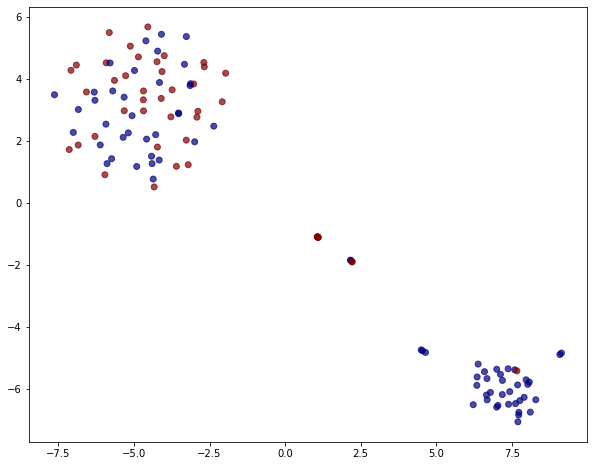

In [122]:
# draw the points
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    weighted_node_embeddings_2d[:, 0],
    weighted_node_embeddings_2d[:, 1],
    c=node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

In [123]:
node_emb_dict = {}
for index, row in square_node_data_no_feature.iterrows():
    if index not in node_emb_dict:
        node_emb_dict[index] = no_weighted_model.wv[index]
    else:
        print(f"index: {index} is already in a dictionary!")

In [124]:
print(type(node_emb_dict['aprv']))

<class 'numpy.ndarray'>


In [125]:
square_node_data_feature = square_node_data_no_feature.copy()
square_node_data_feature['feature'] = [node_emb_dict[i] for i in square_node_data_feature.index]
square_node_data_feature

,feature
node,
triadyn,"[0.003060599, 0.0017094628, 0.0029850695, -0.0..."
incent,"[-0.0011507509, -0.0033844996, -0.00084415823,..."
db,"[-0.0008321469, 0.0014382941, 0.0009349908, 0...."
lift,"[-0.0025191142, 0.0029884337, -0.0034756416, -..."
declin,"[-0.0063753664, 0.43018785, -0.16374195, 0.052..."
...,...
morbid,"[0.003070083, 0.0016754799, 0.00015141426, -0...."
caspofungin,"[-0.104948886, 0.3501777, -0.10349671, -0.2472..."
ethic,"[-0.0012245656, 0.00084956695, -0.0030146735, ..."


### Train mode

#### Method 1. Each patient graph => [model training]

In [126]:
# Dictionaries to use
 # struct: {word: word2vec[128, numpy.array]}
patient_cooc_odd_scores # struct: {cooc_tuple: log_odds_score}
print()

In [128]:
# patient_dead_cooc_df
print(patient_cooc_0)

{111: {('arrest', 'pea'): 5.0, ('cpr', 'pea'): 4.0, ('arrest', 'cpr'): 4.0, ('cpr', 'vasopressin'): 4.0, ('pea', 'vasopressin'): 4.0, ('arrest', 'vasopressin'): 4.0, ('pcv', 'vasopressin'): 2.0, ('cpr', 'pcv'): 2.0, ('pcv', 'pea'): 2.0, ('arrest', 'pcv'): 2.0, ('paralyt', 'pcv'): 2.0, ('paralyt', 'vasopressin'): 2.0, ('cpr', 'paralyt'): 2.0, ('paralyt', 'pea'): 2.0, ('arrest', 'paralyt'): 2.0, ('norepinephrin', 'paralyt'): 2.0, ('norepinephrin', 'pcv'): 2.0, ('norepinephrin', 'vasopressin'): 2.0, ('cpr', 'norepinephrin'): 2.0, ('norepinephrin', 'pea'): 2.0, ('arrest', 'norepinephrin'): 2.0, ('hypothermia', 'norepinephrin'): 2.0, ('hypothermia', 'paralyt'): 2.0, ('hypothermia', 'pcv'): 2.0, ('hypothermia', 'vasopressin'): 2.0, ('cpr', 'hypothermia'): 2.0, ('hypothermia', 'pea'): 2.0, ('arrest', 'hypothermia'): 2.0, ('hypercapnia', 'hypothermia'): 2.0, ('hypercapnia', 'norepinephrin'): 2.0, ('hypercapnia', 'paralyt'): 2.0, ('hypercapnia', 'pcv'): 2.0, ('hypercapnia', 'vasopressin'): 2.0,

In [129]:
print(patient_node_0)

{111: {'arrest': 6.0, 'pea': 5.0, 'cpr': 4.0, 'vasopressin': 4.0, 'pcv': 2.0, 'paralyt': 2.0, 'norepinephrin': 2.0, 'hypothermia': 2.0, 'hypercapnia': 2.0, 'dic': 2.0, 'phenylephrin': 2.0, 'bicarbon': 2.0, 'azotemia': 2.0, 'autopeep': 2.0, 'death': 3.0, 'clinician': 2.0, 'profound': 2.0, 'expir': 2.0}, 346: {'arrest': 4.0, 'sluggish': 6.0}, 404: {'paco': 1.0, 'death': 1.0}, 546: {'oder': 1.0, 'hurt': 1.0, 'historian': 1.0}, 618: {'video': 2.0}, 705: {'dnr': 5.0, 'dni': 2.0, 'cmo': 5.0, 'mso': 2.0}, 726: {}, 1039: {}, 1556: {'mso': 13.0, 'dnr': 8.0, 'dni': 8.0}, 1872: {'pronounc': 1.0}, 1944: {'cvvhd': 5.0}, 2286: {'cyanot': 17.0, 'vasopressin': 14.0, 'purpl': 10.0, 'pitressin': 15.0, 'incis': 10.0}, 2990: {'levoph': 31.0, 'anur': 24.0}, 3055: {'gc': 3.0, 'wish': 3.0, 'cmo': 4.0}, 3099: {'neo': 2.0, 'neosynephrin': 2.0, 'dopamin': 1.0, 'ffp': 2.0, 'vasopressin': 1.0, 'levoph': 1.0, 'hypotherm': 1.0, 'hung': 1.0, 'dic': 1.0, 'cagluc': 1.0, 'suport': 1.0, 'polici': 1.0, 'ethic': 1.0, 'cpr

In [131]:
# Check if all nodes has embeddings
patient_node_set = set()

for k, v in patient_node_0.items():
    for item in v:
        patient_node_set.add(item)
        
    
for k, v in patient_node_1.items():
    for item in v:
        patient_node_set.add(item)

In [132]:
print(len(patient_node_set))

588


In [135]:
for item in patient_node_set:
    if item not in node_emb_dict:
        print(f"item: {item} is not in a node_emb_dict")

item: flight is not in a node_emb_dict
item: dxae is not in a node_emb_dict
item: knew is not in a node_emb_dict
item: harm is not in a node_emb_dict
item: ofm is not in a node_emb_dict
item: azotemia is not in a node_emb_dict
item: mandibl is not in a node_emb_dict
item: vasoconstrict is not in a node_emb_dict
item: wma is not in a node_emb_dict
item: assymetr is not in a node_emb_dict
item: colonoscopi is not in a node_emb_dict
item: emper is not in a node_emb_dict
item: declar is not in a node_emb_dict
item: phasic is not in a node_emb_dict
item: overlay is not in a node_emb_dict
item: institut is not in a node_emb_dict
item: spacer is not in a node_emb_dict
item: occurr is not in a node_emb_dict
item: cramp is not in a node_emb_dict
item: adenosin is not in a node_emb_dict
item: distort is not in a node_emb_dict
item: warmer is not in a node_emb_dict
item: nocturn is not in a node_emb_dict
item: reveiw is not in a node_emb_dict
item: qtc is not in a node_emb_dict
item: iddm is not 

### Load the data

In [ ]:
def create_graph_list(pd_df, cooc_odd_scores, node_emb_dict):
    graphs = []
    labels = []

    for index, row in pd_df.iterrows():
        if row['co_ocurrence']:
            source = []
            target = []
            edge_weight = []
            
            node_feature = []
            node_idx = []
            
            for cooc in row['co_ocurrence']:
                source.extend([cooc[0], cooc[1]])
                target.extend([cooc[1], cooc[0]])
                
                weight = (cooc[0], cooc[1])
                print(weight)
                edge_weight.extend([cooc_odd_scores[weight], cooc_odd_scores[weight]])
            
            # Node feature and index
            for node_idx in row['node_idx']:
                node_idx.append(node_idx)
                node_feature.append(node_emb_dict[node_idx])
                # node_feature.append(1)
                

            square_node_data = pd.DataFrame({"feature_src":node_feature}, index=node_idx)
            square_edges = pd.DataFrame({"source": source, "target": target, "weight":edge_weight})
          
            square = StellarGraph(square_node_data, square_edges)
            graphs.append(square)
            labels.append(row['label'])

            
            
    return graphs, labels

graphs = []
labels = []
features = []

graph_0, label_0 = create_graph_list(patient_dead_cooc_df, cooc_odd_scores, node_emb_dict)
# graph_1, label_1 = create_graph_list(patient_alive_cooc_df)

# graphs.extend(graph_0)
# labels.extend(label_0)
# print(f"graphs: {len(graphs)}, labels: {len(labels)}")
# graphs.extend(graph_1)
# labels.extend(label_1)
# print(f"graphs: {len(graphs)}, labels: {len(labels)}")

In [ ]:
# patient_dead_cooc_df - 252 patients 20% => 50
# patient_alive_cooc_df - 1167  patients 20 => 223

for i, (index, row) in enumerate(patient_dead_cooc_df.iterrows()):
    #TODO
    
for i, (index, row) in enumerate(patient_alive_cooc_df.iterrows()):
    #TODO


#### Method 2. positive group + negative group = Graph with weights. Randow Walk sequences => [model training]

In [ ]:
# norm_square_edge_data = pd.DataFrame(
#     {
#         "source": new_source,
#         "target": new_target,
#         "weight": new_weight,
# #         "feature": weight,
#     }
# )
# norm_square_edge_data

In [ ]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

import numpy as np

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

from gensim.models import Word2Vec

import warnings
import collections
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Only edges
G = StellarGraph(
    edges=square_edge_data, source_column="source", target_column="target"
)

print(G.info())
print('-'*60)

G_norm_0 = StellarGraph(
    edges=square_edge_data_0, source_column="source", target_column="target"
)
print(G_norm_0.info())
print('-'*60)
G_norm_1 = StellarGraph(
    edges=square_edge_data_1, source_column="source", target_column="target"
)
print(G_norm_1.info())


In [ ]:
_, weights = G.edges(include_edge_weight=True)

wt, cnt = np.unique(weights, return_counts=True)

plt.figure(figsize=(10, 8))
plt.bar(wt, cnt, width=0.5, color="b")
plt.title("Edge weights histogram")
plt.ylabel("Count")
plt.xlabel("edge weights")
plt.xticks(np.linspace(-7, 7, 10))

plt.show()

In [ ]:
walk_length = 100  # maximum length of a random walk to use throughout this notebook

In [ ]:
def create_random_walks(graph, weight=True):    
    rw = BiasedRandomWalk(graph)
    if weight:
        weighted_walks = rw.run(
            nodes=graph.nodes(),  # root nodes
            length=walk_length,  # maximum length of a random walk
            n=10,  # number of random walks per root node
            p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
            q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
            weighted=True,  # for weighted random walks
            seed=42,  # random seed fixed for reproducibility
        )
    else:
        weighted_walks = rw.run(
            nodes=graph.nodes(),  # root nodes
            length=walk_length,  # maximum length of a random walk
            n=10,  # number of random walks per root node
            p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
            q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
            seed=42,  # random seed fixed for reproducibility
        )
    print("Number of random walks: {}".format(len(weighted_walks)))
    return weighted_walks

weighted_walks = create_random_walks(G, False)
weighted_walks_0 = create_random_walks(G, True)
weighted_walks_1 = create_random_walks(G, True)

In [ ]:
print(weighted_walks[1])

In [ ]:
print(weighted_walks[1])

In [ ]:
for i in weighted_walks_0:
    if len(i) > 1:
        print(i)

In [ ]:
r_walk = ['dnr', 'cmo', 'dnr', 'mtg', 'dnr', 'cmo', 'dnr', 'option', 'dnr', 'dni', 'levoph', 'prognosi', 'norepinephrin', 'levoph', 'anur', 'levoph', 'dic', 'platelet', 'dic', 'levoph', 'dnr', 'life', 'dnr', 'fibrinogen', 'vasopressin', 'norepinephrin', 'fibrinogen', 'dnr', 'fibrinogen', 'cvvh', 'fibrinogen', 'gvhd', 'caspofungin', 'gvhd', 'caspofungin', 'gvhd', 'fibrinogen', 'declin', 'fibrinogen', 'declin', 'dnr', 'levoph', 'vasopressin', 'levoph', 'platelet', 'dnr', 'platelet', 'dnr', 'dic', 'dnr', 'platelet', 'dic', 'platelet', 'fibrinogen', 'declin', 'fibrinogen', 'levoph', 'dic', 'ffp', 'dic', 'ffp', 'norepinephrin', 'cvvh', 'crrt', 'norepinephrin', 'crrt', 'cvvh', 'norepinephrin', 'cvvh', 'crrt', 'levoph', 'dobutamin', 'levoph', 'dnr', 'vasopressin', 'dnr', 'levoph', 'argatroban', 'levoph', 'palli', 'levoph', 'paralyt', 'levoph', 'dobutamin', 'levoph', 'neo', 'levoph', 'dobutamin', 'levoph', 'cvvhd', 'levoph', 'dni', 'dnr', 'dni', 'wish', 'dnr', 'paralyt', 'dnr', 'cmo', 'dnr']

r_walk_set = set(r_walk)
print("r_walk_set", len(r_walk_set))
print(r_walk_set)

for n, word in enumerate(r_walk):
    
    if r_walk_set:
        if word in r_walk_set:
            r_walk_set.remove(word)
            print(len(r_walk_set))
            print(r_walk_set)
            print(n,"-" *60)
    else:
        print(f"Stopped on {n}")
        print(r_walk[:n])
        break
    
        
    


### Find frequent words for each patient

In [ ]:
pneumonia_dead_no_disch

In [ ]:
pneumonia_alive_no_disch

In [ ]:
word_dict

In [ ]:

# ----
def eachPatientKeyWordsInNotes(disease_df, word_dict):
    
    def denoise_note(text_note, word_dict):           
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_\,\d\*:~=\.\#\-\+\\/\"\'^&]+', ' ', text_note)
        tokenized_note = word_tokenize(note)

        temp = []
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())
            if not stemmed_word in stop_words:
                if stemmed_word in word_dict:
                    temp.append(stemmed_word)

        return list(set(temp))
    
    
    # For dataframe
    patientId_lst = []
    patientFreqWords_lst = []
    # ----
    note = []
    patientId = ""
    count = 0
    
    # read line in from file (each line is one note)
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        
        # only regard certain type of notes
        var1 = int(row['SUBJECT_ID_x'])
        var2 = row['TEXT']
        count += 1
        #Enter for the first time
        if patientId == "":
            patientId = var1
            
        if patientId == var1:
            # denoised note with tokenized key words words
            noteText = denoise_note(var2, word_dict)
            for word in noteText:
                if word not in note:
                    note.append(word)
                    
        else:
            # print "Entered else patientId = {}".format(var1)
            patientId_lst.append(patientId)
            patientFreqWords_lst.append(note)

            patientId = var1
            note = []
            noteText = denoise_note(var2, word_dict)
            for word in noteText:
                if word not in note:
                    note.append(word)


#     print(f"note: {note}")
    patientId_lst.append(patientId)
    patientFreqWords_lst.append(note)
#     print(f"noteText: {noteText}")
  
    print(len(patientId_lst))
    print(len(patientFreqWords_lst))
    
    return pd.DataFrame({"patient_id":patientId_lst, "frequent_words":patientFreqWords_lst})

freq_words_per_patient_0 = eachPatientKeyWordsInNotes(pneumonia_dead_no_disch, word_dict)
freq_words_per_patient_1 = eachPatientKeyWordsInNotes(pneumonia_alive_no_disch, word_dict)

In [ ]:
freq_words_per_patient_0

In [ ]:
freq_words_per_patient_1

In [ ]:
node_raw_content

In [ ]:
# # Working code
# import collections
# from collections import defaultdict
# from pprint import pprint 
# import csv
# import sys

# class Graph:
#     def __init__(self):
#         self.neighbors = defaultdict(list)
#         self.cost = defaultdict(list)
        
#     def add_node(self, source, destination, weight):
#         self.neighbors[source].append(destination)
#         self.cost[source].append(weight)

#     def show_graph(self):
#         print("Destinations:");pprint(dict(self.neighbors))
#         print("Cost:");pprint(dict(self.cost))
    


#     def level_order_traversal(self, source, level_size):

#         # The BFS queue
#         queue = [(source, 0, -1)]

#         # keep track of explored nodes
#         explored = []
#         paths = []
#         temp = [0, source]
#         paths.append(temp)

#         level = [2, 0]
#         level_count = 0

#         while queue:
    
#             level[0] -= 1

#             if level[0] <= 0:
#                 level[0], level[1] = level[1], level[0]

#                 temp_list = []
#                 for x in paths:
#                     if len(x) < level_count + 2:
#                         continue
#                     temp_list.append(x)

#                 # temp_list.sort(key=lambda x: x[0])
#                 # for x in temp_list:
#                 #   print x

#                 print(f"max: {max(node for node in temp_list)}")
#                 print(f"min: {min(node for node in temp_list)}")
#                 print("Number of edges for this level is {}".format(len(temp_list)))

#                 level_count += 1
#                 print("current  level is {}".format(level_count))
#                 print ('===========================================')

#                 if level_count == level_size:
#                     break

#             # Pop the front element of the queue.
#             location, cost_till_now, stops_since_source = queue.pop(0)
#             element = paths.pop(0)

#             if location not in explored:

#                 # Here we count how many children nodes, each parent node has
#                 for neighbor, cost in zip(self.neighbors[location], self.cost[location]):
#                     if explored and neighbor == explored[level_count-1]:
#                         continue

#                     temp = list(element)

#                     level[1] += 1

#                     temp[0] = cost + cost_till_now
#                     temp.append(neighbor)
#                     paths.append(temp)

#                     queue.append((neighbor, cost + cost_till_now, stops_since_source + 1))

#                 explored.append(location)

In [ ]:
import collections
from collections import defaultdict
from pprint import pprint 
import csv
import sys

class Graph:
    def __init__(self):
        self.neighbors = defaultdict(list)
        self.cost = defaultdict(list)
        
    def add_node(self, source, destination, weight):
        self.neighbors[source].append(destination)
        self.cost[source].append(weight)

    def show_graph(self):
        print("Destinations:");pprint(dict(self.neighbors))
        print("Cost:");pprint(dict(self.cost))

In [ ]:
g = Graph() 
count = 0
for index, row in square_edge_data.iterrows():
    var1 = row['source']
    var2 = row['target']
    var6 = row['weight']
    
    g.add_node(var1, var2, float(var6))             
    count += 1
print("\nNumber of coocurrencies in the graph is {}\n".format(count))

In [ ]:
# The BFS queue
queue = [(source, 0, -1)]

# keep track of explored nodes
explored = []
paths = []
temp = [0, source]
paths.append(temp)

level = [2, 0]
level_count = 0

while queue:
    
    level[0] -= 1

    if level[0] <= 0:
        level[0], level[1] = level[1], level[0]

        temp_list = []
        for x in paths:
            if len(x) < level_count + 2:
                continue
            temp_list.append(x)

        # temp_list.sort(key=lambda x: x[0])
        # for x in temp_list:
        #   print x

        print(f"max: {max(node for node in temp_list)}")
        print(f"min: {min(node for node in temp_list)}")
        print("Number of edges for this level is {}".format(len(temp_list)))

        level_count += 1
        print("current  level is {}".format(level_count))
        print ('===========================================')

        if level_count == level_size:
            break

    # Pop the front element of the queue.
    location, cost_till_now, stops_since_source = queue.pop(0)
    element = paths.pop(0)

    if location not in explored:

        # Here we count how many children nodes, each parent node has
        for neighbor, cost in zip(self.neighbors[location], self.cost[location]):
            if explored and neighbor == explored[level_count-1]:
                continue

            temp = list(element)

            level[1] += 1

            temp[0] = cost + cost_till_now
            temp.append(neighbor)
            paths.append(temp)

            queue.append((neighbor, cost + cost_till_now, stops_since_source + 1))

        explored.append(location)

In [ ]:
startNode = "levoph"
level_size = 10

g.level_order_traversal(startNode, int(level_size))

In [ ]:
for i in norm_weighted_walks:
    if len(i) > 1:
        print(i)